In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import  curdoc
output_notebook()

%matplotlib inline

Loading BokehJS ...

## Importing raw data

In [2]:
raw_data = pd.read_csv('/home/roland/Workspace/Data/project_5/globalterrorismdb_0617dist.csv', encoding = "ISO-8859-1")# Looking at raw data
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB
None


/home/roland/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from fuzzywuzzy import fuzz

def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df

from fuzzywuzzy import fuzz
def match_name(name, list_names, min_score=0):
    # -1 score incase we don't get any matches
    max_score = -1
    # Returning empty name for no match as well
    max_name = ""
    # Iternating over all names in the other
    for name2 in list_names:
        #Finding fuzzy match score
        score = fuzz.ratio(name, name2)
        # Checking if we are above our threshold and have a better score
        if(score > max_score):
            max_name = name2
            max_score = score
    
    if max_score < min_score: max_score = -1
    return (max_name, max_score)

def date_renamer(df,threshold = 0):
    # This is where you define what you want your column names to be
    # I know for the terrorist data that iday, imonth, and iyear exist
    # but this could apply to any kind of naming convention.
    dates = ['day','month','year']
    for d in dates:
        match_result = match_name(d, df.columns, min_score=threshold)
        name = match_result[0]
        # If we do not find a score that meets our threshold skip it
        if match_result[1] == -1:
            continue
        df.rename(columns={ name: d }, inplace=True)

# def format_dates(df):
#     dates = ['month','date','year']
#     for d in dates:
#         if d == 'day':
            


In [4]:
# Renaming my columns
date_renamer(raw_data, threshold=70)

In [5]:
raw_data['year'] = pd.to_datetime(raw_data.year, format='%Y')

In [6]:
eda_df = eda_helper(raw_data)

In [7]:
pd.set_option("max_row", None)
eda_df

,data_type,null_count,unique_count
eventid,{int64},0,170350
gname,{str},0,3454
country,{int64},0,205
country_txt,{str},0,205
year,{Timestamp},0,46
day,{int64},0,32
dbsource,{str},0,26
targtype1,{int64},0,22
targtype1_txt,{str},0,22
month,{int64},0,13


In [8]:
# pulling columns without a lot of null values 
features = eda_df[eda_df.null_count < 10000].index
sub_data = raw_data[features].dropna()
del sub_data['eventid']

In [9]:
year_data = sub_data.groupby(['country', 'year']).count()

In [10]:
top_countries = sub_data.groupby('region_txt').count().nlargest(20, 'gname')
top_countries

,gname,country,country_txt,year,day,dbsource,targtype1,targtype1_txt,month,region,...,guncertain1,city,target1,natlty1,natlty1_txt,latitude,longitude,targsubtype1,targsubtype1_txt,nkill
region_txt,,,,,,,,,,,,,,,,,,,,,
Middle East & North Africa,40765,40765,40765,40765,40765,40765,40765,40765,40765,40765,...,40765,40765,40765,40765,40765,40765,40765,40765,40765,40765
South Asia,37159,37159,37159,37159,37159,37159,37159,37159,37159,37159,...,37159,37159,37159,37159,37159,37159,37159,37159,37159,37159
South America,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528,...,15528,15528,15528,15528,15528,15528,15528,15528,15528,15528
Western Europe,14002,14002,14002,14002,14002,14002,14002,14002,14002,14002,...,14002,14002,14002,14002,14002,14002,14002,14002,14002,14002
Sub-Saharan Africa,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175,...,13175,13175,13175,13175,13175,13175,13175,13175,13175,13175
Southeast Asia,9823,9823,9823,9823,9823,9823,9823,9823,9823,9823,...,9823,9823,9823,9823,9823,9823,9823,9823,9823,9823
Central America & Caribbean,6862,6862,6862,6862,6862,6862,6862,6862,6862,6862,...,6862,6862,6862,6862,6862,6862,6862,6862,6862,6862
Eastern Europe,4586,4586,4586,4586,4586,4586,4586,4586,4586,4586,...,4586,4586,4586,4586,4586,4586,4586,4586,4586,4586
North America,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,...,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891


## Model Building Below

First let's get our two populations. I am going to try to model regions in different time periods. I am going to use the Iraq war as the period split.

In [11]:
import pymc3 as pm
import time

def helper(region):
    number_killed_year= sub_data[sub_data.region_txt == region].groupby('year').sum()['attacktype1']
    mean_prior = np.mean(number_killed_year)
    std_prior = np.std(number_killed_year)

    before_iraq = number_killed_year[number_killed_year.index <  pd.datetime(year=2003, month=1, day=1)]
    after_iraq = number_killed_year[number_killed_year.index >= pd.datetime(year=2003, month=1, day=1)]

    before_iraq_mean = np.mean(before_iraq)
    after_iraq_mean = np.mean(after_iraq)
    before_iraq_std = np.std(before_iraq)
    after_iraq_std = np.std(after_iraq)

    with pm.Model() as model:

        before_mean = pm.Normal('before_iraq_mean', mean_prior, sd=std_prior)
        after_mean = pm.Normal('after_iraq_mean', mean_prior, sd=std_prior)

    with model:

        before = pm.Normal('before_iraq', mu=before_mean, observed=before_iraq)
        after = pm.Normal('after_iraq', mu=after_mean, observed=after_iraq)


    with model:

        diff_of_means = pm.Deterministic('difference of means', after_mean - before_mean)


    with model:
        trace = pm.sample(25000, njobs=1)
    return trace

In [12]:

def helper2():
    number_killed_year= sub_data.groupby('year').sum()['attacktype1']
    mean_prior = np.mean(number_killed_year)
    std_prior = np.std(number_killed_year)

    before_iraq = number_killed_year[number_killed_year.index <  pd.datetime(year=2003, month=1, day=1)]
    after_iraq = number_killed_year[number_killed_year.index >= pd.datetime(year=2003, month=1, day=1)]

    before_iraq_mean = np.mean(before_iraq)
    after_iraq_mean = np.mean(after_iraq)
    before_iraq_std = np.std(before_iraq)
    after_iraq_std = np.std(after_iraq)

    with pm.Model() as model:

        before_mean = pm.Normal('before_iraq_mean', mean_prior, sd=std_prior)
        after_mean = pm.Normal('after_iraq_mean', mean_prior, sd=std_prior)

    with model:

        before = pm.Normal('before_iraq', mu=before_mean, observed=before_iraq)
        after = pm.Normal('after_iraq', mu=after_mean, observed=after_iraq)


    with model:

        diff_of_means = pm.Deterministic('difference of means', after_mean - before_mean)


    with model:
        trace = pm.sample(25000, njobs=1)
    return trace

temp = helper2()

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 2.7019e+09:  20%|██        | 40982/200000 [00:03<00:12, 13147.21it/s]
Convergence archived at 42000
Interrupted at 42,000 [21%]: Average Loss = 2.7036e+09
100%|█████████▉| 25488/25500 [02:28<00:00, 152.60it/s]/home/roland/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:440: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.998831938524, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/home/roland/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 104 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 25500/25500 [02:28<00:00, 172.14it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a610978d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1a61ee47f0>]], dtype=object)

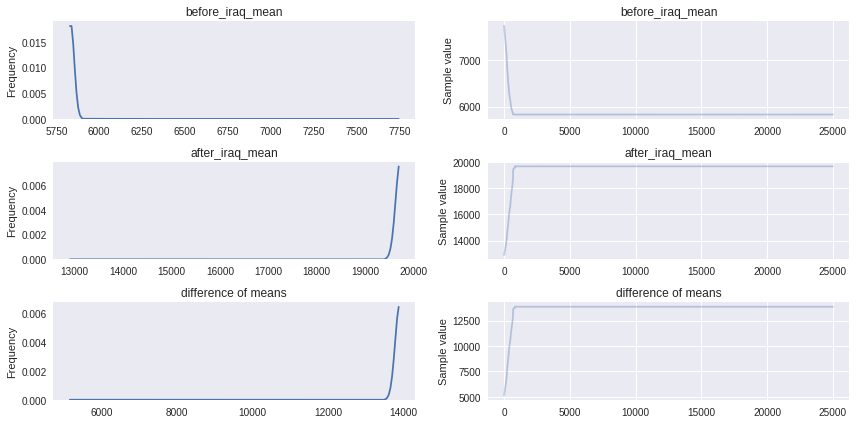

In [16]:
pm.traceplot(temp)

In [13]:
findings = {}
for c in top_countries.index:
    findings[c] = helper(c)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 4.8852e+08:  21%|██        | 41220/200000 [00:03<00:11, 13759.72it/s]
Convergence archived at 42000
Interrupted at 42,000 [21%]: Average Loss = 4.8929e+08
100%|█████████▉| 25487/25500 [01:07<00:00, 360.09it/s]/home/roland/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:440: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.998864749188, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/home/roland/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 8 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 25500/25500 [01:07<00:00, 379.67it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 3.4659e+08:  21%|█

In [13]:
dict_list = []
for k in findings.keys():
    dict_ = {}
    trace = findings[k]

    value = trace.get_values('difference of means')
    dict_['mean'] = np.mean(value)
    dict_['std'] = np.std(value)
    dict_['region'] = k
    dict_list.append(dict_)

In [14]:
findings_df = pd.DataFrame(dict_list)

In [15]:
findings_df.to_csv('terror_means.csv')

## Plots of findings

In [16]:
from bokeh.charts import BoxPlot, output_file, show, Bar
p = Bar(findings_df, values='mean', label='region', color= 'lightblue')
p.yaxis.axis_label = 'Difference of means (fatalities)'
p.title.text = 'Difference in yearly fatalities since War in Iraq (2003)'
p.title.text_font_size = '12pt'
p.legend.visible =False
curdoc().clear()
show(p)

In [227]:
for k in findings
a.get_values('difference of means')

array([-3.76509163, -4.13007742, -4.60262017, ..., -4.16924481,
       -4.40544472, -3.69460094])

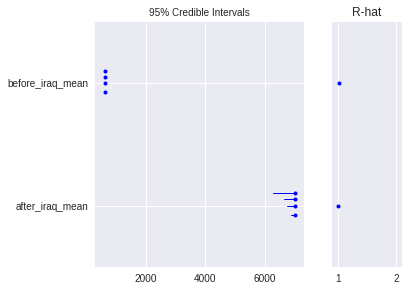

In [181]:
pm.forestplot(trace, varnames=[v.name for v in model.vars])

### Rolling Mean

/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  


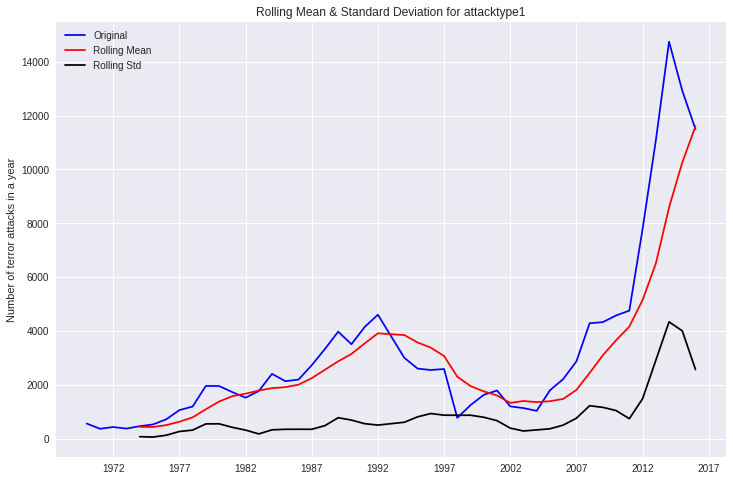

In [23]:
rolmean = pd.rolling_mean(sub_data.groupby('year').count().attacktype1, window=5)
rolstd = pd.rolling_std(sub_data.groupby('year').count().attacktype1, window=5)
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(sub_data.groupby('year').count().attacktype1, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for attacktype1')
plt.ylabel('Number of terror attacks in a year')


/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.
/home/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  


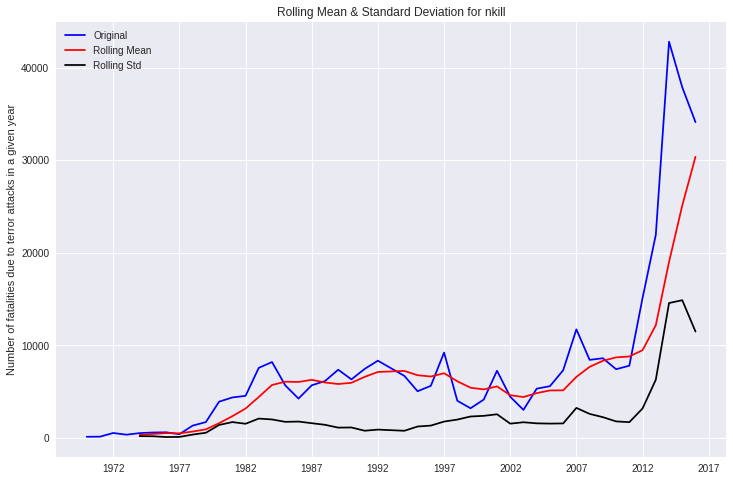

In [25]:
rolmean = pd.rolling_mean(sub_data.groupby('year').sum().nkill, window=5)
rolstd = pd.rolling_std(sub_data.groupby('year').sum().nkill, window=5)
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(sub_data.groupby('year').sum().nkill, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for nkill')
plt.ylabel('Number of fatalities due to terror attacks in a given year')